# Time Series: Predict the Web Traffic

Dado os dados de tráfego da Web medidos em termos de sessões de usuários será necessário prever o número de sessões pros próximos 30 dias. Para isso, é disponibilizado os dados de 1133 dias a partir de 1 de Outubro de 2012.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = pd.read_table('input/input01.txt',names=["sessions"])
data.drop([0],inplace=True) #primeira linha guarda o número de linhas que o arquivo tem

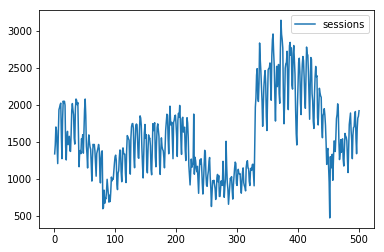

In [3]:
data.plot(kind='line')

#### Decomposição

A decomposição é usada principalmente para análise de séries temporais e, como uma ferramenta de análise, pode ser usada para informar modelos de previsão sobre seu problema.

Ele fornece uma maneira estruturada de pensar sobre um problema de previsão de série temporal, geralmente em termos de complexidade de modelagem e especificamente em termos de como capturar melhor cada um desses componentes em um determinado modelo.

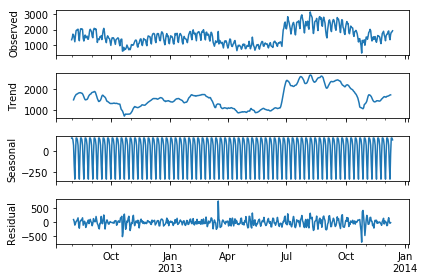

In [4]:
data.index = pd.DatetimeIndex(freq='d', start='2012-08-01', periods=500)
result = seasonal_decompose(data, model='additive')
result.plot()
plt.show()

### Modelo

#### Cross-Validation

In [6]:
arq = pd.read_table('input/input01.txt',names=["sessions"])
X = arq.index.values.reshape(-1, 1)
y = arq['sessions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Aprendizagem Supervisionada

In [7]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression()
regr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Predição

In [8]:
pred = regr.predict(X_test)

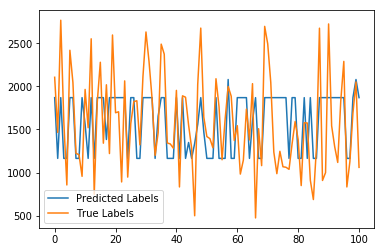

In [26]:
plt.plot(pred, label='Predicted Labels')
plt.plot(y_test.values, label='True Labels')
plt.legend()
plt.show()

Fonte:  
https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/  
http://www.ulb.ac.be/di/map/gbonte/ftp/time_ser.pdf  
http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html